In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting style configuration
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [8]:
# Load the raw dataset
file_path = '../data/raw/unemployment_rate_brazil.csv'
df = pd.read_csv(file_path)

# Display first rows to verify structure
display(df.head())

,territory,period,unemployment_rate
0,Brasil,jan-fev-mar 2012,8.0
1,Brasil,fev-mar-abr 2012,7.8
2,Brasil,mar-abr-mai 2012,7.7
3,Brasil,abr-mai-jun 2012,7.6
4,Brasil,mai-jun-jul 2012,7.5


In [9]:
# 1. Create a mapping dictionary
# The raw data uses Portuguese quarters (e.g., 'jan-fev-mar').
# We map each quarter to its ending month number (e.g., March = 3).
quarter_to_month_map = {
    'jan-fev-mar': 3,
    'fev-mar-abr': 4,
    'mar-abr-mai': 5,
    'abr-mai-jun': 6,
    'mai-jun-jul': 7,
    'jun-jul-ago': 8,
    'jul-ago-set': 9,
    'ago-set-out': 10,
    'set-out-nov': 11,
    'out-nov-dez': 12,
    'nov-dez-jan': 1,
    'dez-jan-fev': 2
}

def parse_ibge_date(period_str):
    """
    Parses the IBGE period string (e.g., 'jan-fev-mar 2012') into a datetime object.
    Logic: Splits the string, looks up the month number, and returns a date (Year-Month-01).
    """
    try:
        # Split 'jan-fev-mar 2012' into ['jan-fev-mar', '2012']
        parts = period_str.split(' ')
        quarter_text = parts[0]
        year = int(parts[1])
        
        # Get the numeric month from our dictionary
        month = quarter_to_month_map.get(quarter_text)
        
        if month is None:
            return None
            
        # Create a datetime object (using day=1 as standard)
        return pd.to_datetime(f'{year}-{month}-01')
    except Exception as e:
        print(f"Error parsing date: {period_str} - {e}")
        return None

# 2. Apply the transformation
df['date'] = df['period'].apply(parse_ibge_date)

# 3. Sort by date to ensure the line chart is chronological
df = df.sort_values('date')

# Check the result
display(df.head())
print(df.info())

,territory,period,unemployment_rate,date
0,Brasil,jan-fev-mar 2012,8.0,2012-03-01
1,Brasil,fev-mar-abr 2012,7.8,2012-04-01
2,Brasil,mar-abr-mai 2012,7.7,2012-05-01
3,Brasil,abr-mai-jun 2012,7.6,2012-06-01
4,Brasil,mai-jun-jul 2012,7.5,2012-07-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   territory          165 non-null    object        
 1   period             165 non-null    object        
 2   unemployment_rate  165 non-null    float64       
 3   date               165 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.3+ KB
None


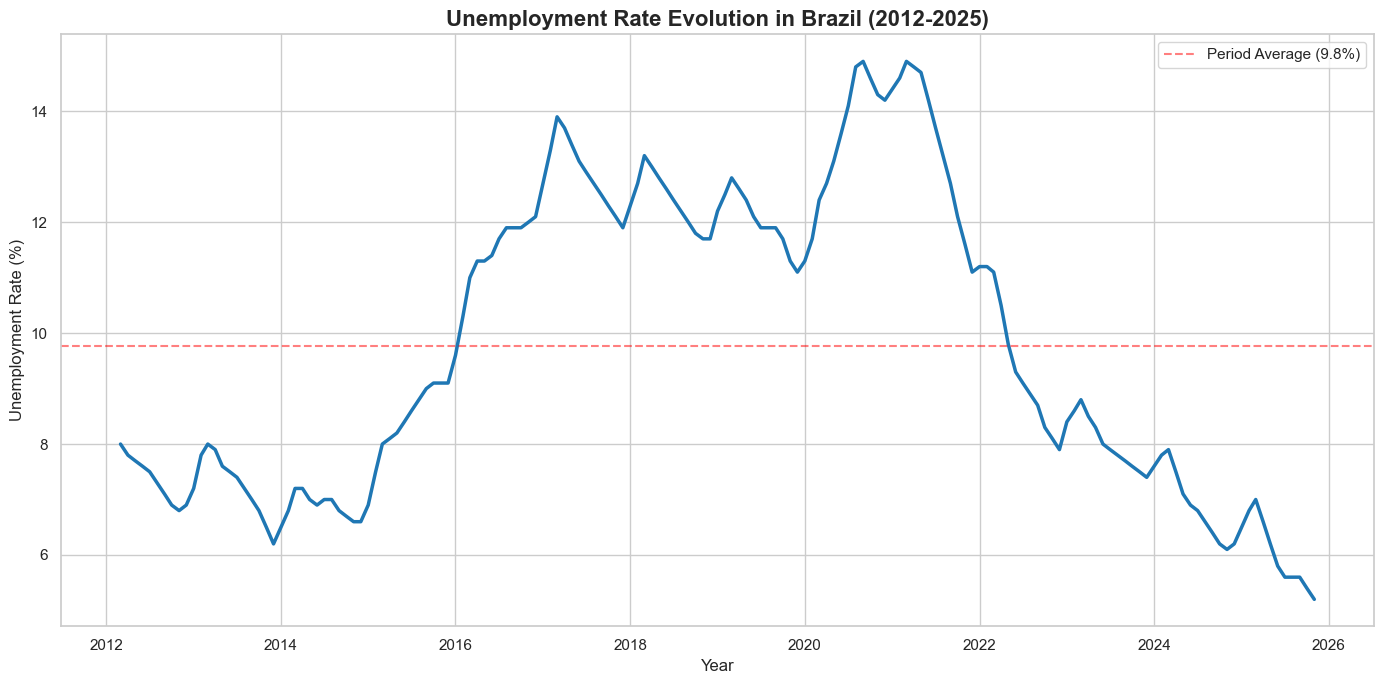

In [10]:
# Create the time series plot
plt.figure(figsize=(14, 7))

# Plot the line
sns.lineplot(
    data=df, 
    x='date', 
    y='unemployment_rate', 
    linewidth=2.5, 
    color='#1f77b4'  # blue
)

# Customizing labels and titles
plt.title('Unemployment Rate Evolution in Brazil (2012-2025)', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)

# Adding a horizontal line for the average
avg_rate = df['unemployment_rate'].mean()
plt.axhline(avg_rate, color='red', linestyle='--', alpha=0.5, label=f'Period Average ({avg_rate:.1f}%)')

plt.legend()
plt.tight_layout()


plt.savefig('../data/unemployment_trend.png')

plt.show()